In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sms
import numpy as np

In [6]:
df_airline = pd.read_csv('AirPassengers.csv')
df_airline.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df_airline.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [8]:
df_airline.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [11]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [12]:
df_airline.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [13]:
df_airline.set_index('Month',inplace=True)

In [14]:
df_airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

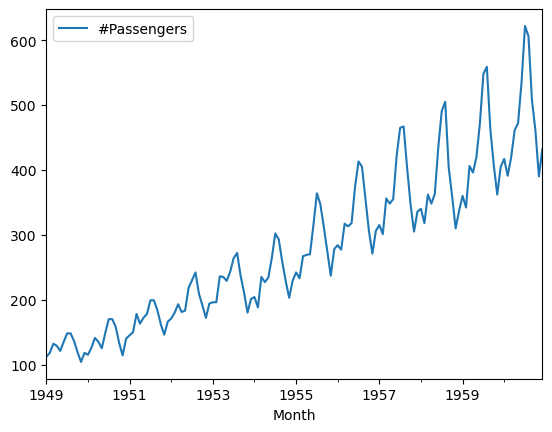

In [15]:
df_airline.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [19]:
adf_test(df_airline['#Passengers'])

ADF Statistics: 0.8153688792060421
p- value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [22]:
df_airline['passenger difference'] = df_airline['#Passengers']-df_airline['#Passengers'].shift(1)

In [23]:
df_airline.head()

,#Passengers,passenger difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [24]:
adf_test(df_airline['passenger difference'].dropna())

ADF Statistics: -2.829266824169981
p- value: 0.05421329028382793
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [25]:
df_airline['passenger second difference'] = df_airline['passenger difference']-df_airline['passenger difference'].shift(1)

In [26]:
df_airline.head()

,#Passengers,passenger difference,passenger second difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [27]:
adf_test(df_airline['passenger second difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142003e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [32]:
## 12 months for seasonal data
df_airline['passenger 12 difference'] = df_airline['#Passengers']-df_airline['#Passengers'].shift(12)

In [33]:
adf_test(df_airline['passenger 12 difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514954
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

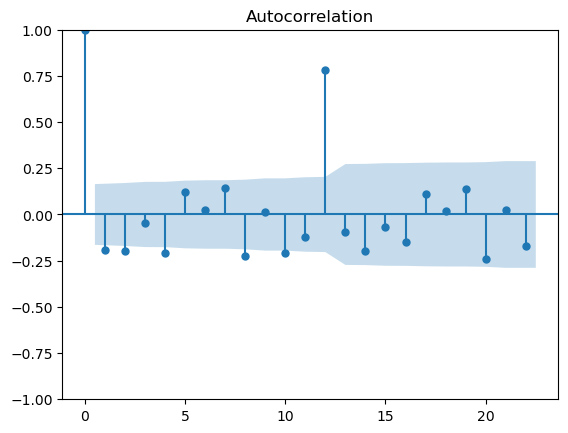

In [35]:
acf = plot_acf(df_airline['passenger second difference'].dropna())

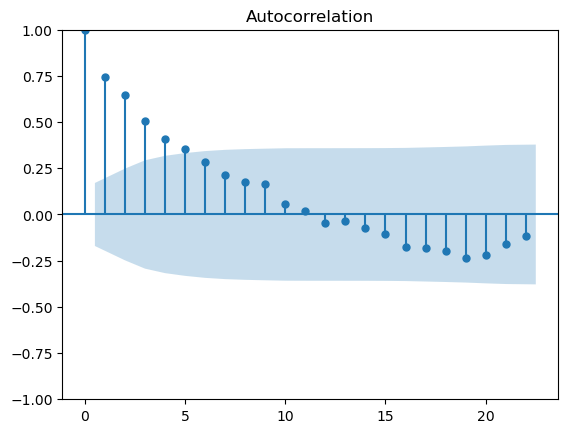

In [38]:
acf = plot_acf(df_airline['passenger 12 difference'].dropna())

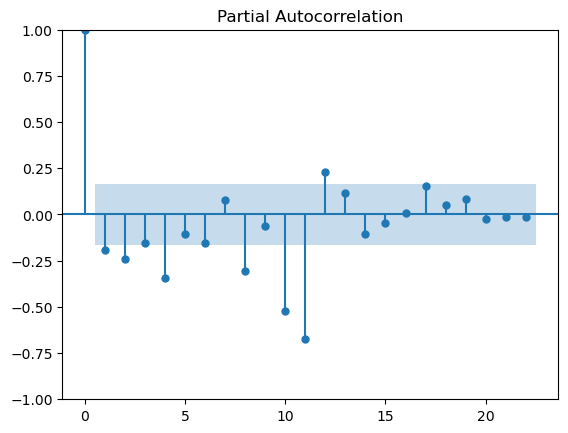

In [37]:
pacf = plot_pacf(df_airline['passenger second difference'].dropna(),method='ywm')

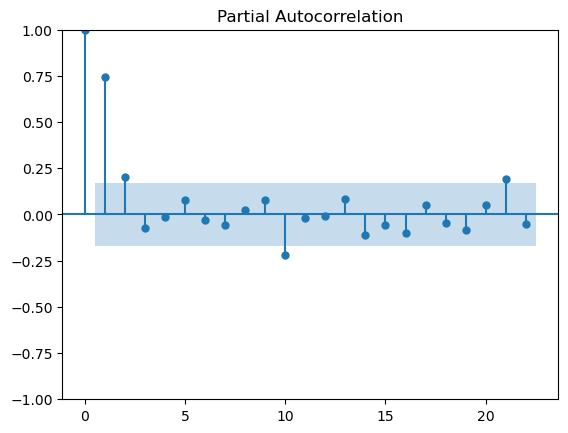

In [39]:
pacf = plot_pacf(df_airline['passenger 12 difference'].dropna(),method='ywm')

In [40]:
df_airline.head()

,#Passengers,passenger difference,passenger second difference,passenger 12 difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [41]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [42]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [43]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [44]:
test_data

,#Passengers,passenger difference,passenger second difference,passenger 12 difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [45]:
train_data

,#Passengers,passenger difference,passenger second difference,passenger 12 difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


In [49]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [86]:
model_ARIMA=ARIMA(train_data['#Passengers'],order=(3,2,5))


/Users/abhisheksingh/miniforge3/envs/deep_dive/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abhisheksingh/miniforge3/envs/deep_dive/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abhisheksingh/miniforge3/envs/deep_dive/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [87]:
model_arima_fit = model_ARIMA.fit()

/Users/abhisheksingh/miniforge3/envs/deep_dive/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [88]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                   84
Model:                 ARIMA(3, 2, 5)   Log Likelihood                -355.544
Date:                Thu, 20 Apr 2023   AIC                            729.087
Time:                        02:01:47   BIC                            750.748
Sample:                    01-01-1949   HQIC                           737.784
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4310      0.169     -2.554      0.011      -0.762      -0.100
ar.L2         -0.3293      0.170     -1.942      0.052      -0.662       0.003
ar.L3         -0.0903      0.123     -0.737      0.461      -0.331       0.150
ma.L1         -0.5453    614.783     -0.001      0.999   -1205.498    1204.408
ma.L2         -0.4470    342.512     -0.001      0.999    -671.759     670.865
ma.L3         -0.4492    347.135     -0.001      0.999    -680.821     679.923
ma.L4         -0.5530    611.380     -0.001      0.999   -1198.835    1197.729
ma.L5          0.9945      0.174      5.723      0.000       0.654       1.335
sigma2       265.5332      2.360    112.509      0.000     260.908     270.159
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.31
Prob(Q):                              0.98   Prob(JB):                         0.31
Heteroskedasticity (H):               3.87   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.7e+23. Standard errors may be unstable.
"""

In [89]:
test_data

,#Passengers,passenger difference,passenger second difference,passenger 12 difference,Predicted_ARIMA
Month,,,,,
1956-01-01,284,6.0,-35.0,42.0,319.0
1956-02-01,277,-7.0,-13.0,44.0,360.0
1956-03-01,317,40.0,47.0,50.0,401.0
1956-04-01,313,-4.0,-44.0,44.0,442.0
1956-05-01,318,5.0,9.0,48.0,483.0
1956-06-01,374,56.0,51.0,59.0,524.0
1956-07-01,413,39.0,-17.0,49.0,565.0
1956-08-01,405,-8.0,-47.0,58.0,606.0
1956-09-01,355,-50.0,-42.0,43.0,647.0


In [90]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [91]:
pred=model_arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['#Passengers']-pred

In [92]:
residuals

Month
1956-01-01     -6.837347
1956-02-01    -14.783415
1956-03-01     13.867273
1956-04-01     22.136917
1956-05-01     21.681480
1956-06-01     73.027749
1956-07-01    110.731695
1956-08-01    101.325382
1956-09-01     48.788612
1956-10-01     -2.527893
1956-11-01    -39.557148
1956-12-01     -6.680632
1957-01-01      0.122020
1957-02-01    -16.038410
1957-03-01     36.818080
1957-04-01     26.661793
1957-05-01     31.502107
1957-06-01     96.346565
1957-07-01    137.191510
1957-08-01    137.035188
1957-09-01     71.878877
1957-10-01     12.722934
1957-11-01    -31.433056
1957-12-01     -2.589148
1958-01-01     -0.745214
1958-02-01    -24.901253
1958-03-01     16.942696
1958-04-01      0.786640
1958-05-01     13.630587
1958-06-01     83.474536
1958-07-01    137.318483
1958-08-01    149.162431
1958-09-01     46.006378
1958-10-01     -1.149674
1958-11-01    -52.305727
1958-12-01    -27.461779
1959-01-01     -6.617832
1959-02-01    -26.773884
1959-03-01     35.070063
1959-04-01     22.9

<Axes: ylabel='Density'>

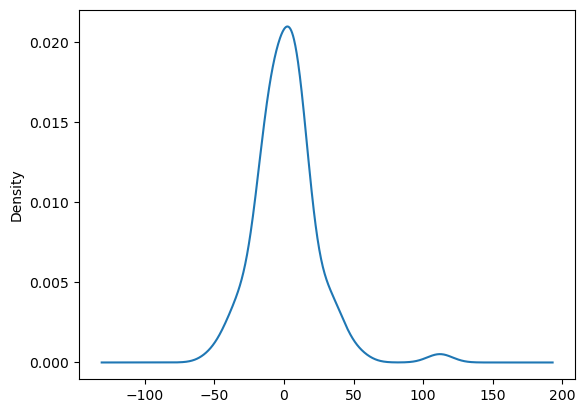

In [93]:
model_arima_fit.resid.plot(kind='kde')

In [94]:
test_data['Predicted_ARIMA']=pred


/var/folders/ty/31gw3fh17wj8ntq2mw14wxzr0000gn/T/ipykernel_9666/301507245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

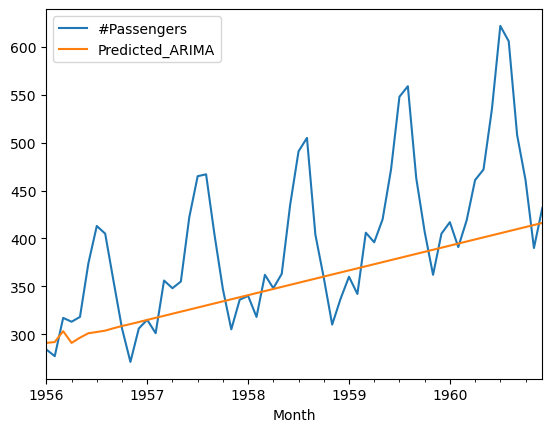

In [95]:
test_data[['#Passengers','Predicted_ARIMA']].plot()


/Users/abhisheksingh/miniforge3/envs/deep_dive/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


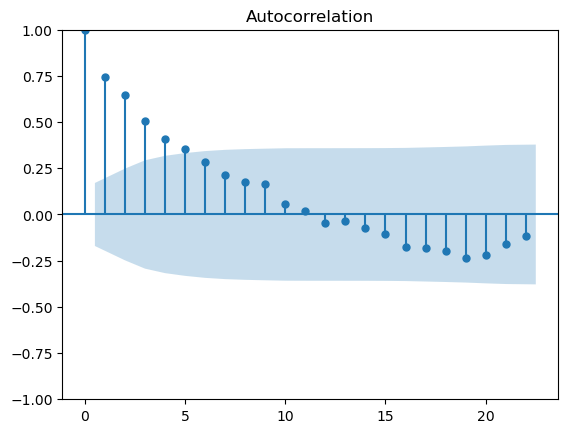

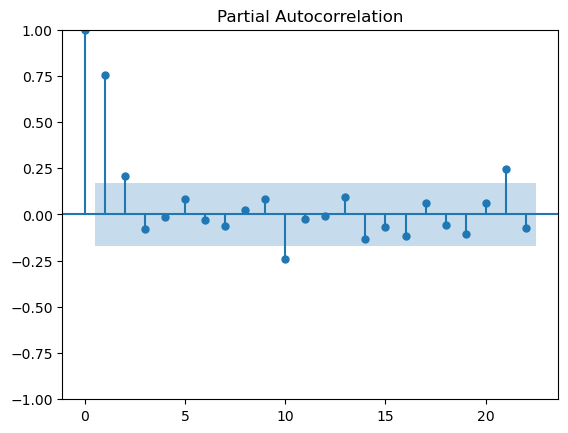

In [98]:
acf12 = plot_acf(df_airline["passenger 12 difference"].dropna())
pacf12 = plot_pacf(df_airline["passenger 12 difference"].dropna())

In [99]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [100]:
model_SARIMA=SARIMAX(train_data['#Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/Users/abhisheksingh/miniforge3/envs/deep_dive/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abhisheksingh/miniforge3/envs/deep_dive/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [101]:
model_SARIMA_fit=model_SARIMA.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18261D+00    |proj g|=  4.32163D-02

At iterate    5    f=  3.17613D+00    |proj g|=  3.18801D-02

At iterate   10    f=  3.17248D+00    |proj g|=  2.87531D-03

At iterate   15    f=  3.16990D+00    |proj g|=  1.51279D-02

At iterate   20    f=  3.16245D+00    |proj g|=  1.30473D-02

At iterate   25    f=  3.15869D+00    |proj g|=  3.72258D-03

At iterate   30    f=  3.15804D+00    |proj g|=  2.70004D-03

At iterate   35    f=  3.15800D+00    |proj g|=  5.65465D-04

At iterate   40    f=  3.15797D+00    |proj g|=  4.46056D-03


 This problem is unconstrained.



At iterate   45    f=  3.15779D+00    |proj g|=  6.09053D-03

At iterate   50    f=  3.15763D+00    |proj g|=  1.72603D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   1.726D-03   3.158D+00
  F =   3.1576279353014365     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/abhisheksingh/miniforge3/envs/deep_dive/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [102]:
model_SARIMA_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Thu, 20 Apr 2023   AIC                            548.481
Time:                                     02:03:43   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.639
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6002      0.941      0.638      0.523      -1.243       2.444
ar.L2          0.8318      0.233      3.573      0.000       0.376       1.288
ar.L3         -0.4549      0.897     -0.507      0.612      -2.213       1.303
ma.L1          0.1818      1.187      0.153      0.878      -2.144       2.508
ma.L2         -0.5366      1.287     -0.417      0.677      -3.058       1.985
ma.L3         -0.0986      0.392     -0.251      0.801      -0.867       0.670
ma.L4         -0.1269      0.347     -0.366      0.714      -0.807       0.553
ma.L5          0.2472      0.363      0.681      0.496      -0.464       0.958
sigma2        87.6888     83.680      1.048      0.295     -76.321     251.698
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
test_data.tail()

,#Passengers,passenger difference,passenger second difference,passenger 12 difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,407.582829
1960-09-01,508,-98.0,-82.0,45.0,409.738882
1960-10-01,461,-47.0,51.0,54.0,411.894934
1960-11-01,390,-71.0,-24.0,28.0,414.050987
1960-12-01,432,42.0,113.0,27.0,416.207039


In [104]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [106]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['#Passengers']-pred_Sarima

<Axes: xlabel='Month'>

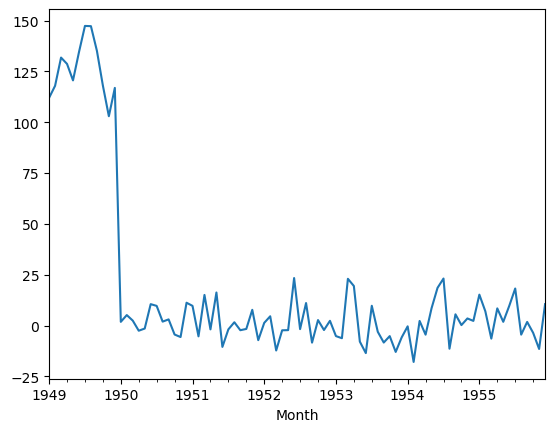

In [107]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

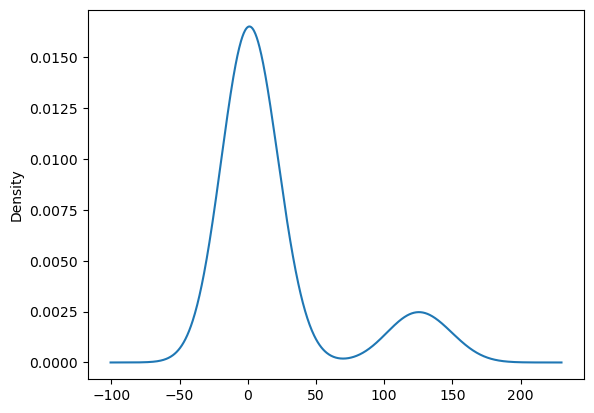

In [108]:
model_SARIMA_fit.resid.plot(kind='kde')

In [109]:
test_data['Predicted_SARIMA']=pred_Sarima

/var/folders/ty/31gw3fh17wj8ntq2mw14wxzr0000gn/T/ipykernel_9666/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [110]:
test_data

,#Passengers,passenger difference,passenger second difference,passenger 12 difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284,6.0,-35.0,42.0,290.837347,NaN
1956-02-01,277,-7.0,-13.0,44.0,291.783415,NaN
1956-03-01,317,40.0,47.0,50.0,303.132727,NaN
1956-04-01,313,-4.0,-44.0,44.0,290.863083,NaN
1956-05-01,318,5.0,9.0,48.0,296.318520,NaN
1956-06-01,374,56.0,51.0,59.0,300.972251,NaN
1956-07-01,413,39.0,-17.0,49.0,302.268305,403.411364
1956-08-01,405,-8.0,-47.0,58.0,303.674618,385.088240
1956-09-01,355,-50.0,-42.0,43.0,306.211388,349.459759


<Axes: xlabel='Month'>

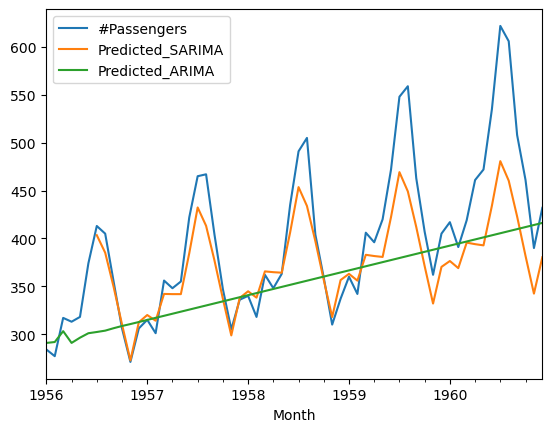

In [111]:
test_data[['#Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()